In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
file_path = "C:\\Users\\samee\\OneDrive\\Desktop\\7th Sem\\Samatrix\\Boot Camp\\archive (3)\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# View basic information about the dataset
print(df.head())
print(df.info())


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

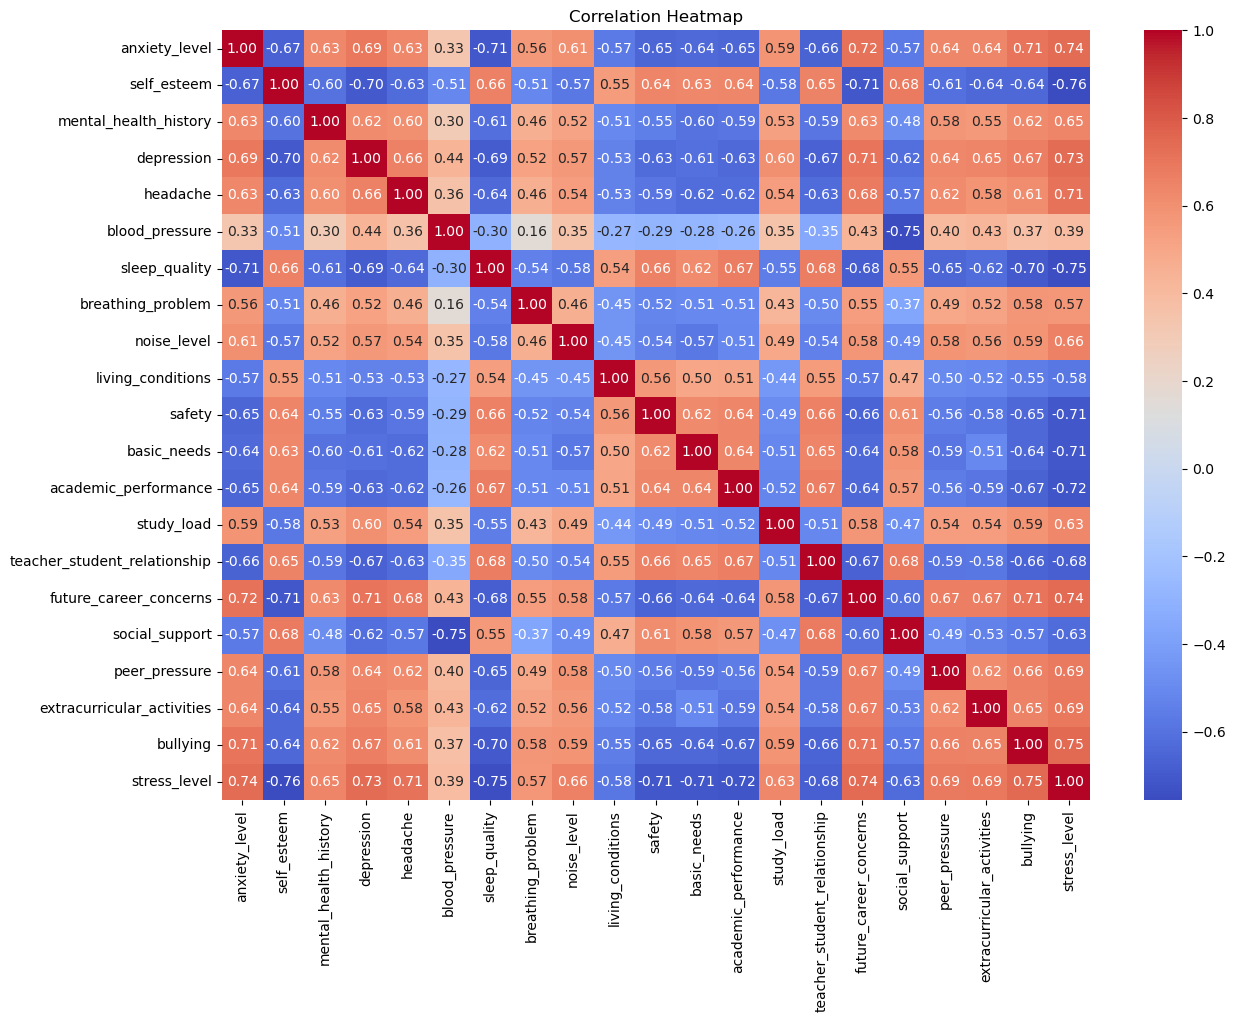

In [3]:
# Correlation heatmap
plt.figure(figsize=(14,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

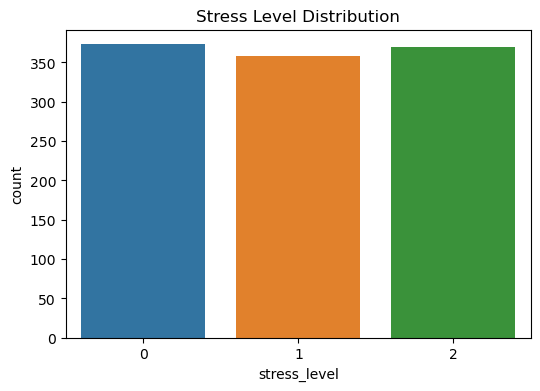

In [4]:
# Visualizing stress level distribution
plt.figure(figsize=(6,4))
sns.countplot(x='stress_level', data=df)
plt.title('Stress Level Distribution')
plt.show()


In [5]:
# Features (X) and target (y)
X = df.drop('stress_level', axis=1)
y = df['stress_level']


In [6]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Convert to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)


In [9]:
# Define parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Three stress levels (0, 1, 2)
    'max_depth': 4,
    'learning_rate': 0.1
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)


In [10]:
# Predictions on the test set
y_pred = xgb_model.predict(dtest)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")


XGBoost Accuracy: 0.8818181818181818
